In [1]:
import os
import xarray as xr
import matplotlib.pyplot as plt
from aqua.graphics.timeseries import _extend_cycle

In [2]:
# Output folder
outputdir='output/netcdf'

In [3]:
# Open 2t files for the timeseries, we open yearly data

icon_histo_2t_ann=os.path.join(outputdir,
                                 'global_time_series_timeseries_2t_ICON_historical-1990_ann.nc')
icon_histo_2t_ann=xr.open_mfdataset(icon_histo_2t_ann)

icon_ssp_2t_ann=os.path.join(outputdir,
                                 'global_time_series_timeseries_2t_ICON_ssp370_ann.nc')
icon_ssp_2t_ann=xr.open_mfdataset(icon_ssp_2t_ann)

ifsnemo_histo_2t_ann=os.path.join(outputdir,
                                 'global_time_series_timeseries_2t_IFS-NEMO_historical-1990_ann.nc')
ifsnemo_histo_2t_ann=xr.open_mfdataset(ifsnemo_histo_2t_ann)

ifsnemo_ssp_2t_ann=os.path.join(outputdir,
                                 'global_time_series_timeseries_2t_IFS-NEMO_ssp370_ann.nc')
ifsnemo_ssp_2t_ann=xr.open_mfdataset(ifsnemo_ssp_2t_ann)

era5_2t_ann=os.path.join(outputdir,
                         'global_time_series_timeseries_2t_ERA5_era5_ann.nc')
era5_2t_ann=xr.open_mfdataset(era5_2t_ann)

era5_2t_std_ann=os.path.join(outputdir,
                          'global_time_series_timeseries_2t_ERA5_era5_std_ann.nc')
era5_2t_std_ann=xr.open_mfdataset(era5_2t_std_ann)

# Restrain ERA5 to the data period, without extended value
era5_2t_ann=era5_2t_ann.sel(time=slice('1990','2020'))

In [4]:
# Open mtpr for the seasonal cycle, we open monthly data

icon_histo_mtpr_mon=os.path.join(outputdir,
                                    'global_time_series_timeseries_mtpr_ICON_historical-1990_mon.nc')
icon_histo_mtpr_mon=xr.open_mfdataset(icon_histo_mtpr_mon)

icon_ssp_mtpr_mon=os.path.join(outputdir,
                                    'global_time_series_timeseries_mtpr_ICON_ssp370_mon.nc')
icon_ssp_mtpr_mon=xr.open_mfdataset(icon_ssp_mtpr_mon)

ifsnemo_histo_mtpr_mon=os.path.join(outputdir,
                                    'global_time_series_timeseries_mtpr_IFS-NEMO_historical-1990_mon.nc')
ifsnemo_histo_mtpr_mon=xr.open_mfdataset(ifsnemo_histo_mtpr_mon)

ifsnemo_ssp_mtpr_mon=os.path.join(outputdir,
                                    'global_time_series_timeseries_mtpr_IFS-NEMO_ssp370_mon.nc')
ifsnemo_ssp_mtpr_mon=xr.open_mfdataset(ifsnemo_ssp_mtpr_mon)

era5_mtpr_mon=os.path.join(outputdir,
                        'global_time_series_timeseries_mtpr_ERA5_era5_mon.nc')
era5_mtpr_mon=xr.open_mfdataset(era5_mtpr_mon)

era5_mtpr_std_mon=os.path.join(outputdir,
                            'global_time_series_timeseries_mtpr_ERA5_era5_std_mon.nc')
era5_mtpr_std_mon=xr.open_mfdataset(era5_mtpr_std_mon)

In [5]:
# Open mtnlwrf+mtnswrf for gregory plot, we open annual data

icon_histo_mtnlwrf_mtnswrf_ann=os.path.join(outputdir,
                                            'global_time_series_timeseries_mtnlwrf+mtnswrf_ICON_historical-1990_ann.nc')
icon_histo_mtnlwrf_mtnswrf_ann=xr.open_mfdataset(icon_histo_mtnlwrf_mtnswrf_ann)

icon_ssp_mtnlwrf_mtnswrf_ann=os.path.join(outputdir,
                                            'global_time_series_timeseries_mtnlwrf+mtnswrf_ICON_ssp370_ann.nc')
icon_ssp_mtnlwrf_mtnswrf_ann=xr.open_mfdataset(icon_ssp_mtnlwrf_mtnswrf_ann)

ifsnemo_histo_mtnlwrf_mtnswrf_ann=os.path.join(outputdir,
                                                'global_time_series_timeseries_mtnlwrf+mtnswrf_IFS-NEMO_historical-1990_ann.nc')
ifsnemo_histo_mtnlwrf_mtnswrf_ann=xr.open_mfdataset(ifsnemo_histo_mtnlwrf_mtnswrf_ann)

ifsnemo_ssp_mtnlwrf_mtnswrf_ann=os.path.join(outputdir,
                                                'global_time_series_timeseries_mtnlwrf+mtnswrf_IFS-NEMO_ssp370_ann.nc')
ifsnemo_ssp_mtnlwrf_mtnswrf_ann=xr.open_mfdataset(ifsnemo_ssp_mtnlwrf_mtnswrf_ann)

In [6]:
# Build seasonal cycle
icon_histo_ss=icon_histo_mtpr_mon.groupby('time.month').mean('time')
icon_ssp_ss=icon_ssp_mtpr_mon.groupby('time.month').mean('time')
ifsnemo_histo_ss=ifsnemo_histo_mtpr_mon.groupby('time.month').mean('time')
ifsnemo_ssp_ss=ifsnemo_ssp_mtpr_mon.groupby('time.month').mean('time')
era5_ss=era5_mtpr_mon.groupby('time.month').mean('time')

# Extend cycle
icon_histo_ss=_extend_cycle(icon_histo_ss)
icon_ssp_ss=_extend_cycle(icon_ssp_ss)
ifsnemo_histo_ss=_extend_cycle(ifsnemo_histo_ss)
ifsnemo_ssp_ss=_extend_cycle(ifsnemo_ssp_ss)
era5_ss=_extend_cycle(era5_ss)
era5_ss_std_mon=_extend_cycle(era5_mtpr_std_mon)

# Convert mtpr to mm/day for readability
icon_histo_ss=icon_histo_ss*86400
icon_ssp_ss=icon_ssp_ss*86400
ifsnemo_histo_ss=ifsnemo_histo_ss*86400
ifsnemo_ssp_ss=ifsnemo_ssp_ss*86400
era5_ss=era5_ss*86400
era5_ss_std_mon=era5_ss_std_mon*86400

In [7]:
color_list = ["#1898e0", "#8bcd45", "#f89e13", "#d24493",
              "#00b2ed", "#dbe622", "#fb4c27", "#8f57bf",
              "#00bb62", "#f9c410", "#fb4865", "#645ccc"]
monthsNumeric = range(0, 13 + 1)  # Numeric months
monthsNames = ["", "J", "F", "M", "A", "M", "J", "J", "A", "S", "O", "N", "D", ""]

In [8]:
ts_plot = [icon_histo_2t_ann, icon_ssp_2t_ann, ifsnemo_histo_2t_ann, ifsnemo_ssp_2t_ann]
ts_label = ['ICON historical', 'ICON ssp370', 'IFS-NEMO historical', 'IFS-NEMO ssp370']
ss_plot = [icon_histo_ss, icon_ssp_ss, ifsnemo_histo_ss, ifsnemo_ssp_ss]
ss_label = ['ICON historical', 'ICON ssp370', 'IFS-NEMO historical', 'IFS-NEMO ssp370']
toa_plot = [icon_histo_mtnlwrf_mtnswrf_ann, icon_ssp_mtnlwrf_mtnswrf_ann,
            ifsnemo_histo_mtnlwrf_mtnswrf_ann, ifsnemo_ssp_mtnlwrf_mtnswrf_ann]

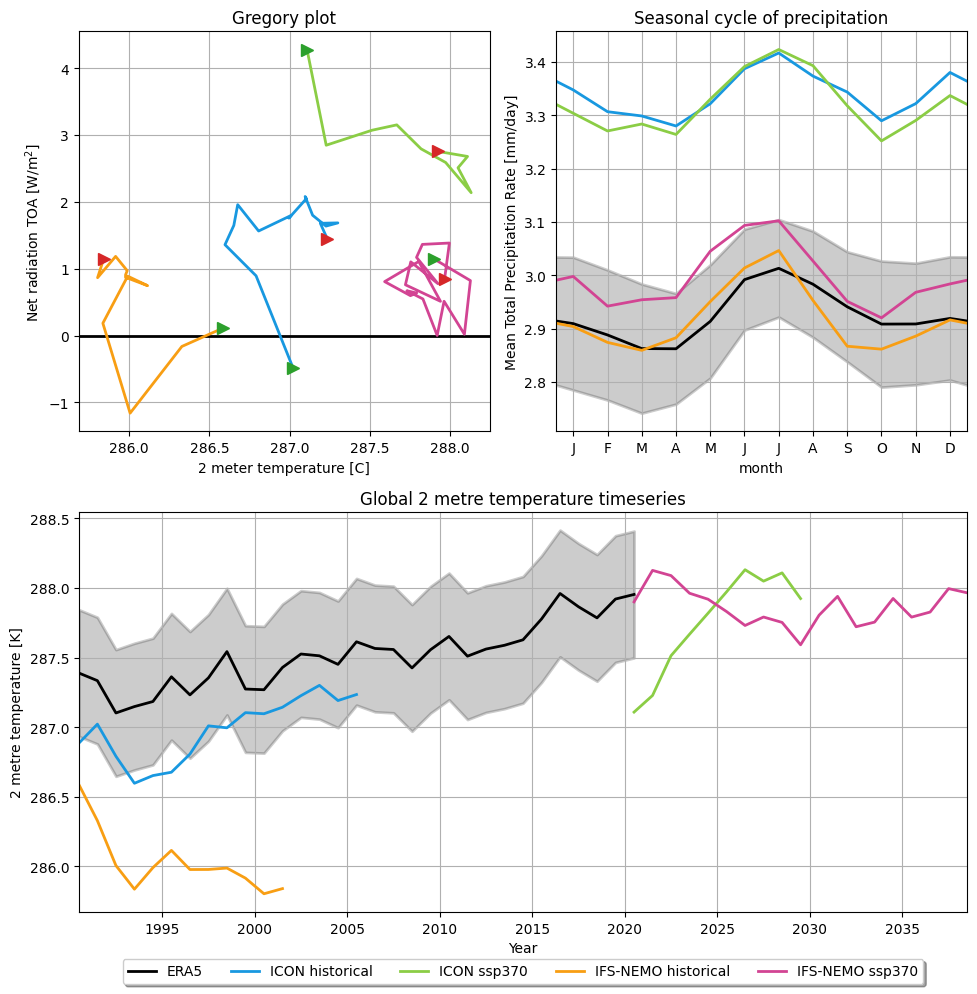

In [11]:
fig = plt.figure(figsize=(10, 10))

# Top line, gregory plot
ax1 = plt.subplot(2, 2, 1)
ax1.axhline(0, color='k', lw=2)
ax1.grid()

for i in range(len(toa_plot)):
    ax1.plot(ts_plot[i]['2t'], toa_plot[i]['mtnlwrf'], color=color_list[i], linestyle='-', lw=2)

markersize=8
for i in range(len(toa_plot)):
    ax1.plot(ts_plot[i]['2t'][0], toa_plot[i]['mtnlwrf'][0], marker='>', markersize=markersize,
             color="tab:green")
    ax1.plot(ts_plot[i]['2t'][-1], toa_plot[i]['mtnlwrf'][-1], marker='>', markersize=markersize,
             color="tab:red")
# First year was corrupted so we need a manual set of the first year for IFS-NEMO historical
ax1.plot(ts_plot[0]['2t'][1], toa_plot[0]['mtnlwrf'][1], marker='>', markersize=markersize,
             color="tab:green")

ax1.set_xlabel("2 meter temperature [C]")
ax1.set_ylabel(r"Net radiation TOA [$\rm W/m^{2}$]")
ax1.set_title('Gregory plot')

# Top line, seasonal cycle
ax2 = plt.subplot(2, 2, 2)
ax2.grid()
ax2.set_xticks(monthsNumeric)
ax2.set_xticklabels(monthsNames)

era5_ss['mtpr'].plot(ax=ax2, label='ERA5', color='black', linestyle='-', lw=2)
ax2.fill_between(era5_ss.month, era5_ss['mtpr'].data - 2.*era5_ss_std_mon['mtpr'].data,
                era5_ss['mtpr'].data + 2.*era5_ss_std_mon['mtpr'].data, color='black', alpha=0.2,
                linestyle='-', lw=2)

for i in range(len(ss_plot)):
    ss_plot[i]['mtpr'].plot(ax=ax2, color=color_list[i], linestyle='-', lw=2)

ax2.set_ylabel('Mean Total Precipitation Rate [mm/day]')
ax2.set_title('Seasonal cycle of precipitation')
ax2.set_xlim(0.5,12.5)

# Bottom line, timeseries
ax3 = plt.subplot(2, 1, 2)
t0 = min(icon_histo_2t_ann.time.data[0], ifsnemo_histo_2t_ann.time.data[0])
t1 = max(icon_ssp_2t_ann.time.data[-1], ifsnemo_ssp_2t_ann.time.data[-1])
ax3.set_xlim(t0, t1)
ax3.grid()

era5_2t_ann['2t'].plot(ax=ax3, label='ERA5', color='black', lw=2)
ax3.fill_between(era5_2t_ann.time.data, era5_2t_ann['2t'].data - 2.*era5_2t_std_ann['2t'].data,
                era5_2t_ann['2t'].data + 2.*era5_2t_std_ann['2t'].data, color='black', alpha=0.2,
                linestyle='-', lw=2)

for i in range(len(ts_plot)):
    ts_plot[i]['2t'].plot(ax=ax3, color=color_list[i], lw=2, label=ts_label[i])

ax3.set_title('Global 2 metre temperature timeseries')
ax3.set_xlabel('Year')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), fancybox=True, shadow=True, ncol=5)

plt.tight_layout()
plt.savefig('timeseries_deliverable.png')